In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.ensemble import IsolationForest


In [ ]:
#veritabanini oku
path = "/content/drive/MyDrive/Dataset/mushrooms.csv"
df =pd.read_csv(path)
df .head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Ya da daha düzenli görmek için:
print("\nMevcut kolonlar listesi:")
for col in df.columns:
    print(col)


Mevcut kolonlar listesi:
class
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat


In [ ]:
# Doğru kolon isimleriyle categorical_columns listesini güncelle
categorical_columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color',
    'population', 'habitat'
]
# Dönüşümü uygula
#Evet, LabelEncoder().fit_transform işlemi kategorik (yazı/metin) verileri sayısal değerlere dönüştürdü. Her benzersiz kategorik değer için 0'dan başlayarak sıralı sayılar atandı.
df[categorical_columns] = df[categorical_columns].apply(LabelEncoder().fit_transform)

# Sonucu kontrol et
print(df.head())


   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

In [ ]:
# Veritabanı hakkında bilgiler
print("Veri Tabanı İnceleme:")
print(df.info())

Veri Tabanı İnceleme:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   int64 
 2   cap-surface               8124 non-null   int64 
 3   cap-color                 8124 non-null   int64 
 4   bruises                   8124 non-null   int64 
 5   odor                      8124 non-null   int64 
 6   gill-attachment           8124 non-null   int64 
 7   gill-spacing              8124 non-null   int64 
 8   gill-size                 8124 non-null   int64 
 9   gill-color                8124 non-null   int64 
 10  stalk-shape               8124 non-null   int64 
 11  stalk-root                8124 non-null   int64 
 12  stalk-surface-above-ring  8124 non-null   int64 
 13  stalk-surface-below-ring  8124 non-null   int64 
 14  st

In [ ]:
# Kaç adet veri olduğunu bulma
print("\nToplam Veri Sayısı:", len(df))


Toplam Veri Sayısı: 8124


In [ ]:
# Eksik verileri kontrol etme
print("\nEksik Veri Kontrolü:")
print(df.isnull().sum())


Eksik Veri Kontrolü:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
#Ortalama
ortalama = df.mean()
print(ortalama)

class                       0.482029
cap-shape                   3.348104
cap-surface                 1.827671
cap-color                   4.504677
bruises                     0.415559
odor                        4.144756
gill-attachment             0.974151
gill-spacing                0.161497
gill-size                   0.309207
gill-color                  4.810684
stalk-shape                 0.567208
stalk-root                  1.109798
stalk-surface-above-ring    1.575086
stalk-surface-below-ring    1.603644
stalk-color-above-ring      5.816347
stalk-color-below-ring      5.794682
veil-type                   0.000000
veil-color                  1.965534
ring-number                 1.069424
ring-type                   2.291974
spore-print-color           3.596750
population                  3.644018
habitat                     1.508616
dtype: float64


In [ ]:
# Medyan (Median)
medyan = df.median()
print(medyan)


class                       0.0
cap-shape                   3.0
cap-surface                 2.0
cap-color                   4.0
bruises                     0.0
odor                        5.0
gill-attachment             1.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  5.0
stalk-shape                 1.0
stalk-root                  1.0
stalk-surface-above-ring    2.0
stalk-surface-below-ring    2.0
stalk-color-above-ring      7.0
stalk-color-below-ring      7.0
veil-type                   0.0
veil-color                  2.0
ring-number                 1.0
ring-type                   2.0
spore-print-color           3.0
population                  4.0
habitat                     1.0
dtype: float64


In [ ]:
#Varyans (Variance)
varyans = df.var()
print(varyans)

class                        0.249708
cap-shape                    2.573872
cap-surface                  1.512586
cap-color                    6.481204
bruises                      0.242900
odor                         4.425676
gill-attachment              0.025184
gill-spacing                 0.135432
gill-size                    0.213624
gill-color                  12.534142
stalk-shape                  0.245513
stalk-root                   1.125946
stalk-surface-above-ring     0.386212
stalk-surface-below-ring     0.456941
stalk-color-above-ring       3.616643
stalk-color-below-ring       3.637761
veil-type                    0.000000
veil-color                   0.058888
ring-number                  0.073476
ring-type                    3.246022
spore-print-color            5.677084
population                   1.567709
habitat                      2.958316
dtype: float64


In [ ]:
# Standart Sapma (Standard Deviation)
std_sapma = df.std()
print(std_sapma)

class                       0.499708
cap-shape                   1.604329
cap-surface                 1.229873
cap-color                   2.545821
bruises                     0.492848
odor                        2.103729
gill-attachment             0.158695
gill-spacing                0.368011
gill-size                   0.462195
gill-color                  3.540359
stalk-shape                 0.495493
stalk-root                  1.061106
stalk-surface-above-ring    0.621459
stalk-surface-below-ring    0.675974
stalk-color-above-ring      1.901747
stalk-color-below-ring      1.907291
veil-type                   0.000000
veil-color                  0.242669
ring-number                 0.271064
ring-type                   1.801672
spore-print-color           2.382663
population                  1.252082
habitat                     1.719975
dtype: float64


In [ ]:
# Minimum ve Makimum degerler
min_deger = df.min()
max_deger = df.max()
print(min_deger)
print(max_deger)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
class                        1
cap-shape                    5
cap-surface                  3
cap-color                    9
bruises                      1
odor                         8
gill-attachment              1
gill-spacing                 1
gill-size                    1
gill-color        

In [ ]:
# Betimsel İstatistiklerin Tümü (Tek bir komutla)
#Eğer tüm istatistikleri (ortalama, medyan, varyans, vs.) tek bir adımda görmek istersen, describe() fonksiyonunu kullanabiliriz
betimsel_istatistikler = df.describe()
print(betimsel_istatistikler)

             class    cap-shape  cap-surface    cap-color      bruises  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.482029     3.348104     1.827671     4.504677     0.415559   
std       0.499708     1.604329     1.229873     2.545821     0.492848   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     2.000000     0.000000     3.000000     0.000000   
50%       0.000000     3.000000     2.000000     4.000000     0.000000   
75%       1.000000     5.000000     3.000000     8.000000     1.000000   
max       1.000000     5.000000     3.000000     9.000000     1.000000   

              odor  gill-attachment  gill-spacing    gill-size   gill-color  \
count  8124.000000      8124.000000   8124.000000  8124.000000  8124.000000   
mean      4.144756         0.974151      0.161497     0.309207     4.810684   
std       2.103729         0.158695      0.368011     0.462195     3.540359   
min       0.00000

In [ ]:
#Kategorik bir özelliğin baskın kategorisini belirlemek için,
# önce her bir kategorinin frekansını saymalı ve ardından en yüksek frekansa sahip olan kategoriyi bulmalısın.
# Bunu yapmak için pandas kütüphanesinin value_counts() ve mode() fonksiyonlarını kullanabilirsin.
# Kategorik sütunun frekansını say (örneğin 'class' sütunu)

baskin_kategori_frekans = df['cap-surface'].value_counts()
print("Kategorik Sütun Frekansları:\n", baskin_kategori_frekans)

# En sık tekrar eden kategoriyi bul
baskin_kategori = df['cap-surface'].mode()[0]
print(f'Baskın kategori: {baskin_kategori}')

Kategorik Sütun Frekansları:
 cap-surface
3    3244
2    2556
0    2320
1       4
Name: count, dtype: int64
Baskın kategori: 3


In [69]:
# Tüm verisetini baz alarak yapılan bu .  Her sütun için baskın değer ve frekans oranını hesaplayan fonksiyon
def calculate_dominance(df):
    dominance_table = pd.DataFrame(columns=['Column', 'Dominant Value', 'Frequency', 'Percentage'])

    rows = []

    for column in df.columns:
        dominant_value = df[column].mode()[0]  # En sık görülen (baskın) değer
        frequency = df[column].value_counts()[dominant_value]  # Bu değerin frekansı
        percentage = (frequency / len(df)) * 100  # Bu değerin toplam içindeki oranı

        # Her satırı bir dictionary olarak oluştur ve sonradan birleştir
        rows.append({
            'Column': column,
            'Dominant Value': dominant_value,
            'Frequency': frequency,
            'Percentage': percentage
        })

    # Tüm satırları bir DataFrame'e dönüştür ve geri döndür
    dominance_table = pd.concat([dominance_table, pd.DataFrame(rows)], ignore_index=True)

    return dominance_table

# Baskınlık tablosunu oluştur
dominance_table = calculate_dominance(df)

# Sonucu kontrol et
print(dominance_table)

                      Column  Dominant Value Frequency  Percentage
0                      class             0.0      4208   51.797144
1                  cap-shape             5.0      3656   45.002462
2                cap-surface             3.0      3244   39.931068
3                  cap-color             4.0      2284   28.114229
4                    bruises             0.0      4748   58.444116
5                       odor             5.0      3528   43.426883
6            gill-attachment             1.0      7914   97.415066
7               gill-spacing             0.0      6812   83.850320
8                  gill-size             0.0      5612   69.079271
9                 gill-color             0.0      1728   21.270310
10               stalk-shape             1.0      4608   56.720827
11                stalk-root             1.0      3776   46.479567
12  stalk-surface-above-ring             2.0      5176   63.712457
13  stalk-surface-below-ring             2.0      4936   60.75

<ipython-input-69-646d02021fa4>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dominance_table = pd.concat([dominance_table, pd.DataFrame(rows)], ignore_index=True)


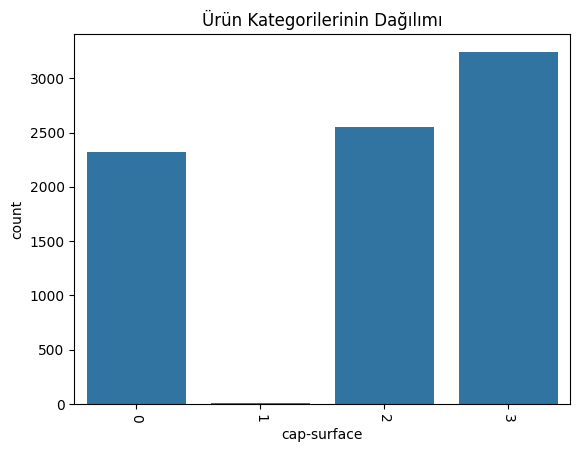

In [64]:
#. Ürün kategorilerinin dağılımı
sns.countplot(x='cap-surface', data=df)
plt.xticks(rotation=-90)
plt.title('Ürün Kategorilerinin Dağılımı')
plt.show()

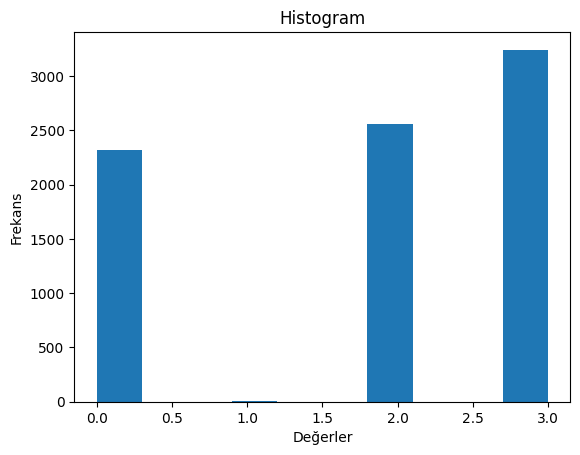

In [ ]:
#SORU3
#Özelliklerin dağılımını incelemek için çeşitli grafik türleri kullanılailir.
#Hangi grafik türünün kullanılacağı, verinin türüne (sayısal veya kategorik) ve analiz etmek istediğin özelliklere bağlıdır.
#Histogram
#Kullanım Durumu: Sayısal verilerin dağılımını görmek için idealdir.
#Açıklama: Veri aralığını belirli aralıklara (bin) bölerek her bir aralıktaki veri sayısını gösterir.
plt.hist(df['cap-surface'], bins=10)  # Sayısal sütun
plt.title('Histogram')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.show()


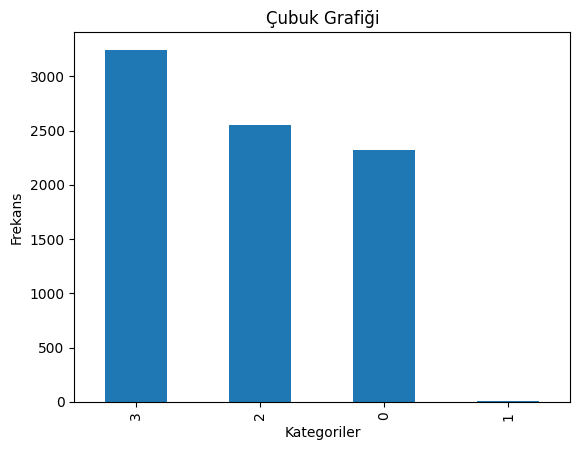

In [ ]:
#. Çubuk Grafiği
#Kullanım Durumu: Kategorik verilerin frekansını karşılaştırmak için uygundur.
#Açıklama: Her bir kategori için bir çubuk çizilir ve çubuğun yüksekliği o kategorinin frekansını gösterir.
#Örnek: Bir kategorik özelliğin her bir kategorisinin sayısını incelemek.

df['cap-surface'].value_counts().plot(kind='bar')
plt.title('Çubuk Grafiği')
plt.xlabel('Kategoriler')
plt.ylabel('Frekans')
plt.show()



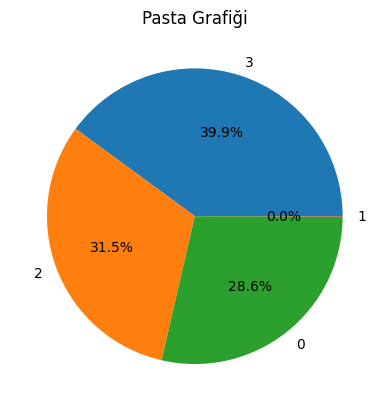

In [ ]:
# Pasta Grafiği
#Kullanım Durumu: Kategorik verilerin oranlarını görmek için idealdir.
#açıklama: Her bir kategori, toplamın yüzde oranını gösteren bir dilim olarak temsil edilir.
#Örnek: Belirli bir kategorik özelliğin yüzdelik dağılımını incelemek.

df['cap-surface'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pasta Grafiği')
plt.ylabel('')  # Y-etiketini gizle
plt.show()



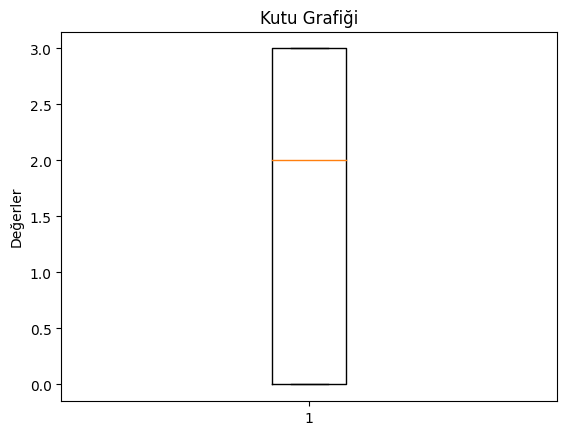

In [ ]:
#Kutu Grafiği (Box Plot)
#Kullanım Durumu: Sayısal verilerin dağılımını ve aykırı değerleri incelemek için uygundur.
#Açıklama: Verinin çeyreklerini gösterir ve aykırı değerleri tespit etmeye yardımcı olur.
plt.boxplot(df['cap-surface'])
plt.title('Kutu Grafiği')
plt.ylabel('Değerler')
plt.show()


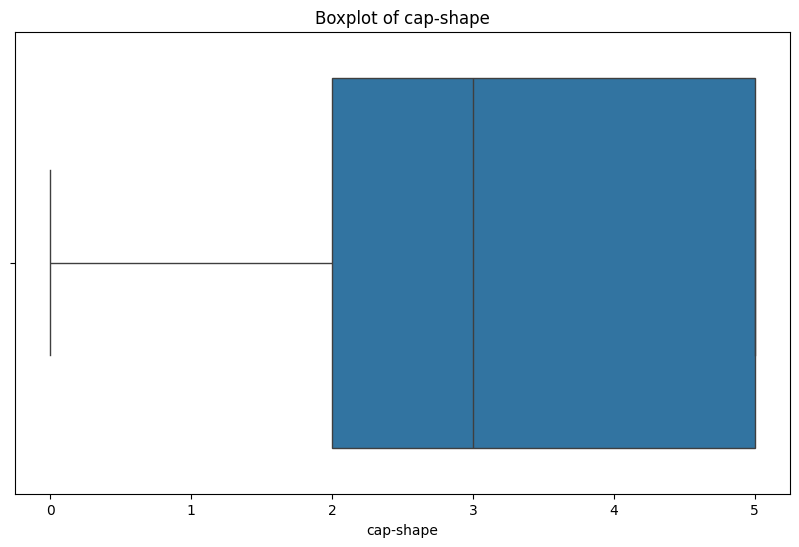

Aykırı değerlerin indeksleri: (array([], dtype=int64),)
Aykırı değerler: Empty DataFrame
Columns: [class, cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, habitat]
Index: []

[0 rows x 23 columns]


In [56]:
#SORU4 veri setinde aykırı (outlier) değer olup olmadıgını nasıl anlarsınız? Sayısal bir veri için aaykırı değerleri  hangi istatistiksel yöntemlerle belirleyebilirsiniz?(Örneğin, boxplot,Zscore kullanarak)
#Aykırı değerleri (outliers) tespit etmek, veri analizi ve istatistikte önemli bir adımdır. Aykırı değerler, veri setindeki diğer gözlemlerden önemli ölçüde farklı olan verilerdir. Sayısal veriler için aykırı değerleri belirlemek için kullanabileceğiniz bazı yaygın yöntemler şunlardır:
#Boxplot Yöntemi
#Boxplot (kutu grafiği), veri dağılımını görselleştirmek için yaygın bir yöntemdir. Aykırı değerleri tespit etmek için kullanabileceğiniz bir yöntemdir:

#Adımlar:
#Verinin minimum, 1. çeyrek (Q1), median (Q2), 3. çeyrek (Q3) ve maksimum değerlerini hesaplayın.
#IQR (Interquartile Range) hesaplayın:
#Aykırı değerler için sınırları belirleyin:
#Alt sınır:
#Üst sınır:
#Bu sınırların dışındaki değerler aykırı değerler olarak kabul edilir.
sütun = 'cap-shape'
# Boxplot ile aykırı değerleri tespit et
plt.figure(figsize=(10,6))
sns.boxplot(x=df[sütun])
plt.title(f'Boxplot of {sütun}')
plt.show()
# Z-Score ile aykırı değerleri tespit et
z_scores = np.abs(stats.zscore(df[sütun]))
aykiri_degerler = np.where(z_scores > 3)

print(f"Aykırı değerlerin indeksleri: {aykiri_degerler}")
print(f"Aykırı değerler: {df.iloc[aykiri_degerler]}")




In [60]:
#SORU5
#Aykırı (outlier) değerler, analiz sonuçlarını önemli ölçüde etkileyebilir, çünkü bu değerler veri setindeki genel eğilimlerden sapar. İşte aykırı değerlerin analiz sonuçlarına olan bazı olası etkileri:
#Aykırı değerler, veri setinin genel yayılımını artırarak standart sapmayı genişletebilir. Bu da verinin daha değişken ve dağınık görünmesine neden olabilir.
#Regresyon analizinde, aykırı değerler modelin eğimini veya kesişim noktasını yanlış tahmin etmesine neden olabilir. Sonuç olarak, tahmin edilen sonuçlar gerçek verilere göre oldukça farklı olabilir.
#Aykırı değerler, K-Means veya Hierarchical Clustering gibi kümeleme algoritmalarının yanlış kümeler oluşturmasına neden olabilir. Kümeleme analizinde, aykırı değerler bazen kendi başlarına ayrı bir küme oluşturabilir ve bu da yanlış sonuçlar doğurabilir.
#Veri dağılımlarının normal olup olmadığını inceleyen analizlerde, aykırı değerler verinin normal dağılımdan uzaklaşmasına neden olabilir.
#Veriyi temizlemek amacıyla, aykırı değerler analizden çıkarılabilir. Bu, özellikle aykırı değerlerin hatalı veya gürültü (noise) verisi olduğundan eminseniz etkili olabilir.
# Aykırı değerlerin kaldırılması
# Aykırı değerlerin sınırlarla değiştirilmesi (Winsorizing)
# Aykırı değerleri kontrol edeceğiniz sütunu belirleyin
sütun = 'cap-shape'  # Örneğin 'cap-shape' sütunu

# Q1 (1. çeyrek) ve Q3 (3. çeyrek) değerlerini hesapla
Q1 = df[sütun].quantile(0.25)
Q3 = df[sütun].quantile(0.75)

# IQR hesapla
IQR = Q3 - Q1

# Alt ve üst sınırları belirle (1.5 * IQR kuralı)
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

# Aykırı değerlerin sınırlarla değiştirilmesi (Winsorizing)
df[sütun] = np.where(df[sütun] < alt_sinir, alt_sinir, df[sütun])
df[sütun] = np.where(df[sütun] > ust_sinir, ust_sinir, df[sütun])

print(df.head())
z_scores = stats.zscore(df[sütun])
# Aykırı değerleri bul (Z-Score > 3 olanlar)
aykiri_indexleri = np.where(np.abs(z_scores) > 3)
# Aykırı değerleri kontrol edin
print(f"Aykırı değerlerin indeksleri: {aykiri_indexleri}")
print(f"Aykırı değerler: {df.iloc[aykiri_indexleri]}")

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1        5.0            2          4        1     6                1   
1      0        5.0            2          9        1     0                1   
2      0        0.0            2          8        1     3                1   
3      1        5.0            3          8        1     6                1   
4      0        5.0            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

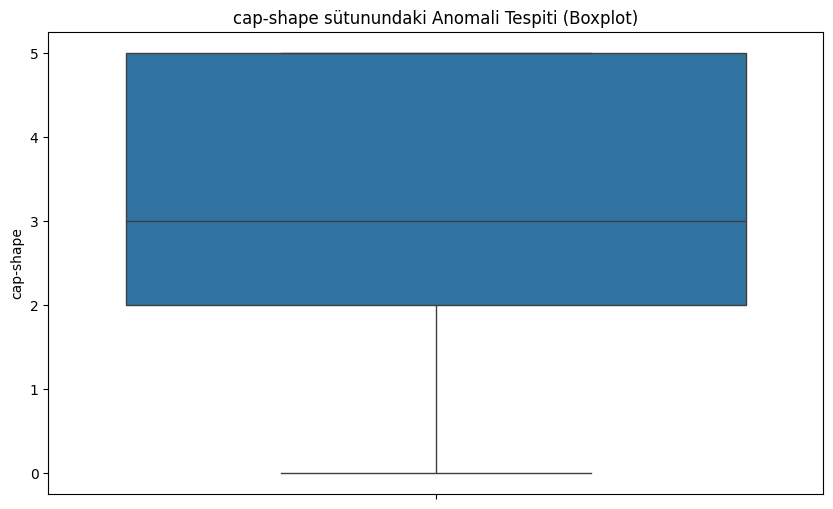

In [62]:
#Boxplot grafikleri, verideki aykırı değerleri görselleştirmek için ideal bir yöntemdir. Verinin dağılımını gösterirken aykırı/anomali değerleri açıkça işaretler.
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[column])
    plt.title(f"{column} sütunundaki Anomali Tespiti (Boxplot)")
    plt.show()

# Örneğin 'cap-shape' sütunu için boxplot çizelim
plot_boxplot(df, 'cap-shape')

In [66]:
# csv ye gore anomalı testi Isolation Forest ile anomali tespiti
model = IsolationForest(contamination=0.05, random_state=42)  # %5 anomali olduğunu varsayıyoruz
df['anomaly'] = model.fit_predict(df)

# Anomalileri filtrele (-1 anomali, 1 normal veri)
anomalies = df[df['anomaly'] == -1]

# Anomali sonuçlarını görüntüle
print(f"Anomali sayısı: {len(anomalies)}")
print(anomalies.head())

Anomali sayısı: 407
      class  cap-shape  cap-surface  cap-color  bruises  odor  \
3984      0        5.0            3          0        1     5   
4106      1        0.0            2          0        1     5   
4165      0        2.0            0          1        0     5   
4194      1        2.0            2          0        1     2   
4276      0        3.0            3          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
3984                1             0          0           1  ...   
4106                1             0          0           2  ...   
4165                1             1          1          10  ...   
4194                1             0          0          10  ...   
4276                1             1          1          10  ...   

      stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
3984                       2                       7          0           2   
4106                       7